##Crawling

In [ ]:
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=8c56b86fdfe6538fd2a63ff46b73fa829ac9a2e520fef18c3c374cc9dc486d6b
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Membuat list kosong untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 50

for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://pta.trunojoyo.ac.id/c_search/byprod/10/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <li> dengan atribut data-id yang mengandung "id-"
        data_items = soup.find_all('li', attrs={"data-id": lambda x: x and "id-" in x})

        # Iterasi melalui elemen-elemen yang ditemukan
        for item in data_items:
            # Mengambil judul berita
            judul_berita = item.find('a', class_='title').text.strip()

            # Mengambil informasi penulis dan dosen pembimbing
            penulis = item.find_all('div', style="padding:2px 2px 2px 2px;")
            penulis_info = [p.span.text.strip() for p in penulis]

            # Mengambil URL selengkapnya
            selengkapnya_link = item.find('a', class_='gray button')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil teks abstrak
                abstrak = selengkapnya_soup.find('p', align='justify').text.strip()
            else:
                abstrak = "Tidak dapat mengambil abstrak"

            # Menambahkan data ke list
            all_data.append([judul_berita] + penulis_info + [abstrak])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
df = pd.DataFrame(all_data, columns=["Judul", "Penulis", "Pembimbing 1", "Pembimbing 2", "Abstrak"])
# df.to_csv('data_berita_abstrak.csv', index=False)

In [ ]:
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...
...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...
248,IMPLEMENTASI ACCELEROMETER DALAM PEMBUATAN GAM...,Penulis : Muhammad Agus Priantoro,"Dosen Pembimbing I : Yonathan Ferry Hendrawan,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom., ...",Perkembangan game saat ini sebanding dengan pe...


In [ ]:
# Simpan DataFrame ke dalam file CSV
df.to_csv('data_berita_informatika_abstrak.csv', index=False)

##Import File CSV Crawling

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rifkiavendika/PPW/main/data_berita_informatika_abstrak.csv")

In [ ]:
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...
...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...
248,IMPLEMENTASI ACCELEROMETER DALAM PEMBUATAN GAM...,Penulis : Muhammad Agus Priantoro,"Dosen Pembimbing I : Yonathan Ferry Hendrawan,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom., ...",Perkembangan game saat ini sebanding dengan pe...


##CaseFolding

In [ ]:
data=df['Abstrak']
df['CaseFolding'] = data.str.lower()

In [ ]:
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,CaseFolding
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik (siakad) merupaka...
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...
...,...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...,speech application programming interface (sapi...
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...,abstrak\r\ndalam rancang bangun enterprise res...
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...,dalam perancangan enterprise resource plannin...
248,IMPLEMENTASI ACCELEROMETER DALAM PEMBUATAN GAM...,Penulis : Muhammad Agus Priantoro,"Dosen Pembimbing I : Yonathan Ferry Hendrawan,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom., ...",Perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...


##Character Cleansing

In [ ]:
#Import Library untuk Character Cleansing
import string
import re #regex library
data=df['CaseFolding'].astype(str)

In [ ]:
def character_cleansing(text):
  # menghapus tab, new line, dan back slice
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # menghapus non ASCII (emoticon, chinese word, .etc)
  text = text.encode('ascii', 'replace').decode('ascii')
  # menghapus mention, link, hashtag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  # menghapus incomplete URL
  text =  text.replace("http://", " ").replace("https://", " ")
  #menghapus nomor
  text = re.sub(r"\d+", "", text)
  #menghapus punctuation
  text = text.translate(str.maketrans("","",string.punctuation))
  #menghapus spasi leading & trailing
  text = text.strip()
  #menghapus spasi tunggal dan ganda
  text = re.sub('\s+',' ',text)
  # menghapus kata 1 abjad
  text=re.sub(r"\b[a-zA-Z]\b", "", text)
  return text

df['CharacterCleansing'] = data.apply(character_cleansing)

In [ ]:
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,CaseFolding,CharacterCleansing
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik (siakad) merupaka...,sistem informasi akademik siakad merupakan sis...
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah di perguruan tinggi merupak...
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...
...,...,...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...,speech application programming interface (sapi...,speech application programming interface sapi ...
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...,abstrak\r\ndalam rancang bangun enterprise res...,abstrak dalam rancang bangun enterprise resour...
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...,dalam perancangan enterprise resource plannin...,dalam perancangan enterprise resource planning...
248,IMPLEMENTASI ACCELEROMETER DALAM PEMBUATAN GAM...,Penulis : Muhammad Agus Priantoro,"Dosen Pembimbing I : Yonathan Ferry Hendrawan,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom., ...",Perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...


##Tokenisasi

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data=df['CharacterCleansing']
# import word_tokenize
from nltk.tokenize import word_tokenize
def word_tokenizing(text):
    return word_tokenize(text)
df['Tokenization'] = data.apply(word_tokenizing)
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,CaseFolding,CharacterCleansing,Tokenization
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik (siakad) merupaka...,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."
...,...,...,...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...,speech application programming interface (sapi...,speech application programming interface sapi ...,"[speech, application, programming, interface, ..."
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...,abstrak\r\ndalam rancang bangun enterprise res...,abstrak dalam rancang bangun enterprise resour...,"[abstrak, dalam, rancang, bangun, enterprise, ..."
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...,dalam perancangan enterprise resource plannin...,dalam perancangan enterprise resource planning...,"[dalam, perancangan, enterprise, resource, pla..."
248,IMPLEMENTASI ACCELEROMETER DALAM PEMBUATAN GAM...,Penulis : Muhammad Agus Priantoro,"Dosen Pembimbing I : Yonathan Ferry Hendrawan,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom., ...",Perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...,"[perkembangan, game, saat, ini, sebanding, den..."


##StopWord

In [ ]:
!pip install nltk

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
data=df['Tokenization']
def stopword(words):
  list_stopwords = stopwords.words('indonesian')
  #Mengubah List ke dictionary
  list_stopwords = set(list_stopwords)
  #remove stopword pada list token
  return [word for word in words if word not in list_stopwords]
#Stopwording
df['Stopword'] = data.apply(stopword)
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,CaseFolding,CharacterCleansing,Tokenization,Stopword
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik (siakad) merupaka...,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka...","[sistem, informasi, akademik, siakad, sistem, ..."
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den...","[berjalannya, koneksi, jaringan, komputer, lan..."
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak...","[web, server, perangkat, lunak, server, berfun..."
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m...","[penjadwalan, kuliah, perguruan, kompleks, per..."
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ...","[seiring, perkembangan, teknologi, didunia, mu..."
...,...,...,...,...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...,speech application programming interface (sapi...,speech application programming interface sapi ...,"[speech, application, programming, interface, ...","[speech, application, programming, interface, ..."
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...,abstrak\r\ndalam rancang bangun enterprise res...,abstrak dalam rancang bangun enterprise resour...,"[abstrak, dalam, rancang, bangun, enterprise, ...","[abstrak, rancang, bangun, enterprise, resourc..."
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...,dalam perancangan enterprise resource plannin...,dalam perancangan enterprise resource planning...,"[dalam, perancangan, enterprise, resource, pla...","[perancangan, enterprise, resource, planning, ..."
248,IMPLEMENTASI ACCELEROMETER DALAM PEMBUATAN GAM...,Penulis : Muhammad Agus Priantoro,"Dosen Pembimbing I : Yonathan Ferry Hendrawan,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom., ...",Perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...,perkembangan game saat ini sebanding dengan pe...,"[perkembangan, game, saat, ini, sebanding, den...","[perkembangan, game, sebanding, perkembangan, ..."


In [ ]:
stop_words = set(stopwords.words('indonesian'))
print(stop_words)

{'kemungkinan', 'bagaimanakah', 'asalkan', 'mereka', 'hari', 'sekadarnya', 'akhirnya', 'rata', 'diketahui', 'demikian', 'sebutlah', 'sebaliknya', 'bahkan', 'berlalu', 'entahlah', 'justru', 'tegasnya', 'bersiap', 'katakanlah', 'seusai', 'keduanya', 'sebagainya', 'olehnya', 'bukanlah', 'pukul', 'seberapa', 'seperlunya', 'nah', 'menjawab', 'diperlukan', 'dua', 'kinilah', 'dilalui', 'sedemikian', 'seenaknya', 'siapakah', 'termasuk', 'lima', 'masalah', 'buat', 'apakah', 'tiba-tiba', 'hanya', 'cukup', 'disebut', 'setibanya', 'mengetahui', 'bulan', 'beginilah', 'jelaslah', 'tersebut', 'ibaratnya', 'bisa', 'akulah', 'dijelaskannya', 'katanya', 'tandas', 'dimaksud', 'kesampaian', 'mirip', 'sebesar', 'semakin', 'bolehkah', 'kapanpun', 'apa', 'dialah', 'diperkirakan', 'dan', 'manakala', 'bagaimana', 'semua', 'setidaknya', 'yakni', 'cukupkah', 'gunakan', 'merasa', 'ditunjuki', 'bersama', 'sambil', 'tertuju', 'secara', 'betul', 'dimaksudkannya', 'berkeinginan', 'menjadi', 'diperbuat', 'di', 'adanya

##Stemming

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada kolom token
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Kolom token yang ingin di-stem
data = df["Stopword"]

# Melakukan stemming pada kolom token tertentu
df["Stemming"] = data.apply(stem_tokens)


In [ ]:
df

,Judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,CaseFolding,CharacterCleansing,Tokenization,Stopword,Stemming
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Penulis : A.Ubaidillah S.Kom,Dosen Pembimbing I : Budi Setyono M.T,Dosen Pembimbing II :Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik (siakad) merupaka...,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka...","[sistem, informasi, akademik, siakad, sistem, ...","[sistem, informasi, akademik, siakad, sistem, ..."
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"Penulis : M. Basith Ardianto,","Dosen Pembimbing I : Drs. Budi Soesilo, MT","Dosen Pembimbing II :Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den...","[berjalannya, koneksi, jaringan, komputer, lan...","[jalan, koneksi, jaring, komputer, lancar, gan..."
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,"Penulis : Akhmad Suyandi, S.Kom","Dosen Pembimbing I : Drs. Budi Soesilo, M.T","Dosen Pembimbing II :Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak...","[web, server, perangkat, lunak, server, berfun...","[web, server, perangkat, lunak, server, fungsi..."
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penulis : Heri Supriyanto,"Dosen Pembimbing I : Mulaab, S.Si., M.Kom","Dosen Pembimbing II :Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m...","[penjadwalan, kuliah, perguruan, kompleks, per...","[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Penulis : Septian Rahman Hakim,"Dosen Pembimbing I : Arik Kurniawati, S.Kom., ...","Dosen Pembimbing II :Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ...","[seiring, perkembangan, teknologi, didunia, mu...","[iring, kembang, teknologi, dunia, muncul, tek..."
...,...,...,...,...,...,...,...,...,...,...
245,Perancangan media pengenalan huruf mengunakan ...,Penulis : m hasyim asrori,"Dosen Pembimbing I : Cucun Very Angkoso, S.T.,...","Dosen Pembimbing II :Arik Kurniawati, S.Kom.,M.T",Speech Application Programming Interface (SAPI...,speech application programming interface (sapi...,speech application programming interface sapi ...,"[speech, application, programming, interface, ...","[speech, application, programming, interface, ...","[speech, application, programming, interface, ..."
246,Rancang Bangun ERP (Enterprise Resource Planni...,Penulis : Fery Febriyan Syah,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",ABSTRAK\r\nDalam rancang bangun Enterprise Res...,abstrak\r\ndalam rancang bangun enterprise res...,abstrak dalam rancang bangun enterprise resour...,"[abstrak, dalam, rancang, bangun, enterprise, ...","[abstrak, rancang, bangun, enterprise, resourc...","[abstrak, rancang, bangun, enterprise, resourc..."
247,Rancang Bangun ERP ( Enterprise Resource Plann...,Penulis : Rhiyananta Catur Yudowicitro,"Dosen Pembimbing I : Hermawan.,ST., M.Kom","Dosen Pembimbing II :Rika Yunitarini., ST., MT",Dalam perancangan Enterprise Resource Plannin...,dalam perancangan enterprise resource plannin...,dalam perancangan enterprise resource planning...,"[dalam, perancangan, enterprise, resource, pla...","[perancangan, enterprise, resource, planning, ...","[ancang, enterprise, resource, planning, erp, ..."
248,IMPLEMENTASI ACCELEROMETE

In [ ]:
df.to_csv("Data+Preprocessing.csv", index=False)

##Feature Extraction

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Menggabungkan token-token kembali menjadi teks
df["Teks"] = df["Stemming"].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df["Teks"]

0      sistem informasi akademik siakad sistem inform...
1      jalan koneksi jaring komputer lancar ganggu ha...
2      web server perangkat lunak server fungsi terim...
3      jadwal kuliah guru kompleks masalah variabel t...
4      iring kembang teknologi dunia muncul teknologi...
                             ...                        
245    speech application programming interface sapi ...
246    abstrak rancang bangun enterprise resource pla...
247    ancang enterprise resource planning erp butuh ...
248    kembang game banding kembang teknologi langsun...
249    enterprice resource planning erp bentuk enterp...
Name: Teks, Length: 250, dtype: object

In [ ]:
# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Menghitung TF dan membentuk VSM
tf_matrix = vectorizer.fit_transform(df["Teks"])

# Membentuk DataFrame dari matriks TF
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Hasil VSM dalam term frequency
tf_df

,aam,ability,abjad,absolut,absolute,abstract,abstrak,abstraksi,abu,acak,...,yakersuda,yale,yamaha,yan,yatu,ycrcb,yogyakarta,zachman,zaman,zf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,2,0,3
247,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Word2Vec

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Membangun model Word2Vec dari kolom "Stemming"
word2vec_model = Word2Vec(df["Stemming"], vector_size=100, window=5, min_count=1, sg=0)

In [ ]:
vectors = [word2vec_model.wv[token] for token in df['Stemming'] if token]

In [ ]:
import numpy as np

# Menghitung rata-rata vektor kata untuk setiap dokumen
average_vectors = []
for doc_vectors in vectors:
    if len(doc_vectors) > 0:
        average_vector = np.mean(doc_vectors, axis=0)
        average_vectors.append(average_vector)
    else:
        # Jika dokumen tidak memiliki vektor kata, kita bisa mengisi dengan vektor nol
        average_vectors.append(np.zeros(100))

average_vectors

[array([-0.04915428,  0.17573187,  0.0334021 ,  0.0082684 ,  0.00318122,
        -0.36763275,  0.15800402,  0.43837976, -0.08191717, -0.13141927,
        -0.1809929 , -0.35183045,  0.00968814,  0.07645752,  0.07710303,
        -0.14864473,  0.04533113, -0.23813713, -0.03303039, -0.3493382 ,
         0.16708803,  0.04322861,  0.06693541, -0.05244887, -0.04860555,
         0.06297731, -0.20880334, -0.11720175, -0.1491808 ,  0.09109614,
         0.1582351 ,  0.09491922, -0.02800539, -0.12287838, -0.1262379 ,
         0.20162094, -0.00719693, -0.14660828, -0.18982837, -0.32446444,
         0.05838193, -0.16608204,  0.02959188,  0.02993325,  0.18641856,
        -0.06341324, -0.20694293, -0.10536573,  0.06306553,  0.03628404,
         0.16210526, -0.17272417, -0.03068018, -0.01177501, -0.1719252 ,
         0.02468173,  0.1135093 , -0.1031026 , -0.3000145 ,  0.10588153,
         0.0414763 ,  0.03415766, -0.03724509, -0.05873156, -0.2360475 ,
         0.18247056,  0.12414889,  0.24678408, -0.2

In [ ]:
# Membuat DataFrame dari average_vectors
avg = pd.DataFrame(average_vectors)
avg

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.049154,0.175732,0.033402,0.008268,0.003181,-0.367633,0.158004,0.438380,-0.081917,-0.131419,...,0.313515,0.081894,-0.031674,0.036362,0.291829,0.180732,0.152617,-0.162984,0.092596,-0.027799
1,-0.044262,0.168305,0.028633,0.011481,-0.000942,-0.351267,0.153296,0.421034,-0.080902,-0.123601,...,0.301050,0.076424,-0.031079,0.034991,0.281329,0.173246,0.148404,-0.157485,0.088436,-0.029439
2,-0.048420,0.180352,0.030805,0.008692,0.001541,-0.381751,0.161544,0.456304,-0.084215,-0.138468,...,0.328115,0.087833,-0.033640,0.038196,0.307269,0.189436,0.156617,-0.170126,0.097121,-0.029017
3,-0.063669,0.230357,0.038220,0.009983,0.001786,-0.482726,0.207745,0.578504,-0.108119,-0.172159,...,0.415420,0.106793,-0.042065,0.049105,0.385671,0.236658,0.199552,-0.215900,0.126020,-0.038613
4,-0.045529,0.168751,0.030524,0.007563,0.001425,-0.356650,0.149626,0.426100,-0.082182,-0.127482,...,0.304743,0.080295,-0.032886,0.039025,0.283273,0.176124,0.147439,-0.159620,0.088486,-0.025480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.051495,0.187143,0.033650,0.005782,0.004679,-0.392566,0.167794,0.469394,-0.087440,-0.143088,...,0.334049,0.087216,-0.033366,0.040060,0.313491,0.192135,0.161702,-0.174030,0.098278,-0.027985
246,-0.046728,0.167582,0.031538,0.007251,0.001696,-0.352255,0.149584,0.420992,-0.079920,-0.126041,...,0.298989,0.078332,-0.031840,0.034971,0.281580,0.172677,0.145240,-0.157682,0.089733,-0.027129
247,-0.047509,0.168947,0.031223,0.007084,0.000709,-0.355890,0.151557,0.424467,-0.080022,-0.127301,...,0.301857,0.079106,-0.031859,0.035226,0.283922,0.174681,0.146945,-0.158374,0.090890,-0.027578
248,-0.053376,0.200943,0.037354,0.007014,0.003932,-0.420705,0.180858,0.502594,-0.095882,-0.149452,...,0.360056,0.094522,-0.034600,0.045443,0.336218,0.209100,0.172549,-0.188603,0.106398,-0.032893


In [ ]:
# Menyimpan DataFrame ke file Excel
avg.to_excel('avg_word2vec.xlsx', index=False, header=False)

##Permodelan Topik

In [ ]:
from gensim import corpora
from gensim.models import LdaModel

# Membuat kamus (dictionary) dari dokumen
dictionary = corpora.Dictionary(df['Stemming'])

# Membuat korpus
corpus = [dictionary.doc2bow(text) for text in df['Stemming']]


In [ ]:
# Membuat model LDA
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

In [ ]:
import pandas as pd

# Mendapatkan distribusi topik untuk setiap dokumen
topic_distribution = [lda_model[doc] for doc in corpus]

# Membuat DataFrame untuk proporsi topik dalam dokumen
df_topic_dist = pd.DataFrame(topic_distribution, columns=[f'Topic {i+1}' for i in range(num_topics)])

# Mendapatkan distribusi kata untuk setiap topik
word_distribution = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Membuat DataFrame untuk proporsi kata dalam topik
df_word_dist = pd.DataFrame([[word[0] for word in topic[1]] for topic in word_distribution],
                            columns=[f'Topic {i+1}' for i in range(num_topics)])



In [ ]:
# Menampilkan proporsi topik dalam dokumen
print("Proporsi Topik dalam Dokumen:")
df_topic_dist

Proporsi Topik dalam Dokumen:


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,"(5, 0.98915076)",None,None,None,None,None,None,None,None,None
1,"(0, 0.99150735)",None,None,None,None,None,None,None,None,None
2,"(4, 0.99181545)",None,None,None,None,None,None,None,None,None
3,"(0, 0.57398814)","(3, 0.295746)","(7, 0.119967125)",None,None,None,None,None,None,None
4,"(2, 0.98928165)",None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
245,"(2, 0.543086)","(6, 0.44665033)",None,None,None,None,None,None,None,None
246,"(3, 0.9935694)",None,None,None,None,None,None,None,None,None
247,"(3, 0.9928515)",None,None,None,None,None,None,None,None,None
248,"(9, 0.9896501)",None,None,None,None,None,None,None,None,None


In [ ]:
# Menampilkan proporsi kata dalam topik
print("\nProporsi Kata dalam Topik:")
df_word_dist


Proporsi Kata dalam Topik:


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,ajar,jaring,teliti,sistem,kembang,nilai,ipv,metode,hasil,data
1,metode,tulis,kenal,proses,sistem,hasil,ajar,aplikasi,teliti,milik
2,hasil,metode,kenal,sistem,game,uji,ajar,bahasa,teliti,proses
3,data,hasil,teliti,citra,metode,sistem,nilai,akurasi,proses,fitur
4,nilai,metode,dokumen,sistem,hasil,teliti,kerja,tingkat,proses,putus
5,data,hasil,sistem,nilai,metode,proses,salah,uji,algoritma,teliti
6,data,sistem,hasil,uji,dasar,nilai,siswa,proses,ajar,sesuai
7,hasil,game,metode,sistem,ajar,butuh,aplikasi,nilai,proses,jaring
8,citra,proses,hasil,sistem,data,teliti,metode,batik,fitur,uji
9,game,sistem,hasil,aplikasi,metode,citra,teliti,main,teknologi,uji


##Klastering

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi model K-means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Latih model K-means dengan vektor dokumen yang sudah dibuat dengan word2vec
kmeans.fit(average_vectors)

# Dapatkan label klaster untuk setiap dokumen
labels = kmeans.predict(average_vectors)

# Sekarang 'labels' berisi nomor klaster untuk setiap dokumen


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Buat DataFrame dari dokumen dan label klaster
hasil_cluster = pd.DataFrame({'Dokumen': df['Abstrak'], 'Klaster': labels})

# Tampilkan DataFrame
hasil_cluster

,Dokumen,Klaster
0,Sistem informasi akademik (SIAKAD) merupaka...,3
1,Berjalannya koneksi jaringan komputer dengan l...,0
2,Web server adalah sebuah perangkat lunak serve...,3
3,Penjadwalan kuliah di Perguruan Tinggi me...,1
4,Seiring perkembangan teknologi yang ada diduni...,0
...,...,...
245,Speech Application Programming Interface (SAPI...,3
246,ABSTRAK\r\nDalam rancang bangun Enterprise Res...,0
247,Dalam perancangan Enterprise Resource Plannin...,0
248,Perkembangan game saat ini sebanding dengan pe...,3


In [ ]:
from sklearn.metrics import silhouette_score

# Hitung nilai siluet
silhouette_avg = silhouette_score(average_vectors, labels)

# Tampilkan nilai siluet
print(f"Nilai Siluet: {silhouette_avg}")

Nilai Siluet: 0.5399102568626404


##Ringkasan Dokumen

In [ ]:
!pip install sumy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 20.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21694 sha256=703f9add80b1097672f2f7b8ae102651a6a6528bfa0f7ed94082722e3f68f8a2
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=9fac51fb6284feb1341ec7f0e39fcda3032aad20739bbf26d02c5a4d62eee7e9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=61f04b9044474a3a3c2c0c57bd5733dbe6c3e1734f4a92b480a08f8aede81219
  Stored in directory: /root/.cache/pip/whee

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Inisialisasi list untuk menyimpan ringkasan dari setiap dokumen
ringkasan_dokumen = []

dokumen = df['Abstrak']

for doc in dokumen:
    # Inisialisasi parser untuk dokumen
    parser = PlaintextParser.from_string(doc, Tokenizer("english"))

    # Inisialisasi ekstraktor ringkasan dengan metode LSA
    summarizer = LsaSummarizer()

    # Dapatkan ringkasan dengan jumlah kalimat yang diinginkan (contoh: 3)
    ringkasan = summarizer(parser.document, 3)

    # Ubah ringkasan menjadi string
    ringkasan = " ".join(str(sentence) for sentence in ringkasan)

    # Tambahkan ringkasan ke dalam list
    ringkasan_dokumen.append(ringkasan)

# Tampilkan ringkasan dari semua dokumen
for i, ringkasan in enumerate(ringkasan_dokumen):
    print(f"Ringkasan Dokumen {i+1}:\n{ringkasan}\n")


Ringkasan Dokumen 1:
Di Universitas Trunojoyo telah tersedia SIAKAD,  namun  masih  menggunakan  database  terpusat. Sistem seperti ini memberikan kelebihan yaitu perawatannya mudah  selain  itu  juga  membutuhkan  sedikit  biaya,  namun sistem  tersebut  juga  berpotensi  mengahadapi  kendala-kendala  yaitu  dalam  proses  transaksi  data  karena  padatnya jaringan yang menuju database SIAKAD, kelambatan dalam pemrosesan  respon  query  dikarenakan  data  yang  tersimpan semakin besar dan pemrosesan semakin kompleks, dan  juga memiliki kelemahan dalam hal ketersediaan data. Karena dalam basisdata terdistribusi terdapat keuntungan yang tidak dimiliki oleh basisdata  terpusat yaitu pengawasan distribusi, reability,  availability,  kecepatan  dalam  pemrosesan  query dan otonomi local

Ringkasan Dokumen 2:
Berjalannya koneksi jaringan komputer dengan lancar dan tanpa gangguan merupakan harapan seluruh penggunanya, terutama pihak yang bertanggung jawab pada bidang itu, yakni administrator

##Ekstraksi Dokumen

In [1]:
!pip install requests beautifulsoup4

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Inisialisasi list untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 1

# Looping untuk mengambil judul dan isi konten berita dari setiap halaman
for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://news.detik.com/indeks/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <h3> dengan class 'media__title'
        judul_berita_elements = soup.find_all('h3', class_='media__title')

        # Looping untuk mengambil judul dan isi konten dari setiap berita
        for judul_element in judul_berita_elements:
            # Mengambil judul berita
            judul_berita = judul_element.text.strip()

            # Mengambil URL selengkapnya
            selengkapnya_link = judul_element.find('a')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil isi konten berita
                isi_berita_elements = selengkapnya_soup.find_all('div', class_='detail__body-text')
                isi_berita = "\n".join([elem.text.strip() for elem in isi_berita_elements])
            else:
                isi_berita = "Tidak dapat mengambil berita"

            # Menambahkan data ke list
            all_data.append([judul_berita] + [isi_berita])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
berita_online = pd.DataFrame(all_data, columns=["Judul Berita", "Isi Berita"])

In [3]:
berita_online

,Judul Berita,Isi Berita
0,"Konsumsi Sabu, 2 Pegawai Pemkab Lumajang Ditan...",Satuan Narkoba Polres Lumajang menangkap dua o...
1,"4 Kendaraan Kecelakaan Beruntun, Lalin Tol Bek...",Jakarta - Sebanyak 4 kendaraan mengalami kecel...
2,MAKI: Polda Metro Bisa Jemput Paksa Jika Firli...,Jakarta - Polda Metro Jaya mengagendakan peman...
3,5 Hal Diketahui soal Pj Bupati Sorong Terjerat...,"Jakarta - Bupati Sorong, Yan Piet Mosso terja..."
4,DPR Restui Agus Subiyanto Jadi Panglima TNI hi...,Jakarta - Komisi I DPR RI telah menyetujui KSA...
5,"Malam Ini, KPU Undi Nomor Urut Anies-Cak Imin,...",Jakarta - Komisi Pemilihan Umum (KPU) RI telah...
6,Tiada Hal Meringankan bagi Haris Azhar di Tunt...,Jakarta - Jaksa penuntut umum (JPU) menuntut ...
7,"Ada Kendaraan Alami Gangguan, Lalin di Tol Jag...",Jakarta - Sebuah kendaraan mobil box mengalami...
8,"Gempa M 5,5 Guncang Kepulauan Sangihe Sulut","Jakarta - Gempa magnitudo (M) 5,5 terjadi di K..."
9,Pukat UGM Minta Firli Kooperatif Penuhi Panggi...,Jakarta - Ketua KPK Firli Bahuri dipanggil Pol...


##Bentuk TF-IDF isi berita

In [4]:
#Mengambil 5 data sebagai contoh
data = berita_online['Isi Berita'].head(5)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks berita menjadi vektor TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Membuat DataFrame untuk hasil TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


##Kosinus similaritas

In [6]:
df_tfidf

,00,08,11,112,12,13,14,17,20,2023,...,wit,with,ya,yaitu,yakin,yan,yang,yasin,yld,yudo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.023391,0.000000,0.000000,0.000000,0.033498,0.111225,0.000000,0.023391,...,0.00000,0.023391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04152,0.000000
2,0.000000,0.000000,0.030131,0.026742,0.021575,0.035818,0.000000,0.017909,0.000000,0.015066,...,0.00000,0.015066,0.213932,0.021575,0.053483,0.000000,0.071636,0.080225,0.00000,0.000000
3,0.027245,0.000000,0.076101,0.000000,0.054490,0.067848,0.000000,0.000000,0.000000,0.076101,...,0.06754,0.019025,0.000000,0.000000,0.000000,0.202619,0.180928,0.000000,0.00000,0.000000
4,0.030711,0.019033,0.064336,0.000000,0.000000,0.050986,0.015355,0.038239,0.019033,0.042891,...,0.00000,0.010723,0.000000,0.030711,0.000000,0.000000,0.152957,0.000000,0.00000,0.057098


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Menghitung matriks similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat DataFrame untuk similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, columns=range(1, len(data) + 1), index=range(1, len(data) + 1))


In [8]:
# Menampilkan similarity matrix
print("Similarity Matrix:")
df_similarity

Similarity Matrix:


,1,2,3,4,5
1,1.000000,0.005476,0.013399,0.044333,0.039433
2,0.005476,1.000000,0.044405,0.104171,0.074630
3,0.013399,0.044405,1.000000,0.145776,0.138397
4,0.044333,0.104171,0.145776,1.000000,0.145711
5,0.039433,0.074630,0.138397,0.145711,1.000000


##Graph

In [ ]:
!pip install networkx matplotlib

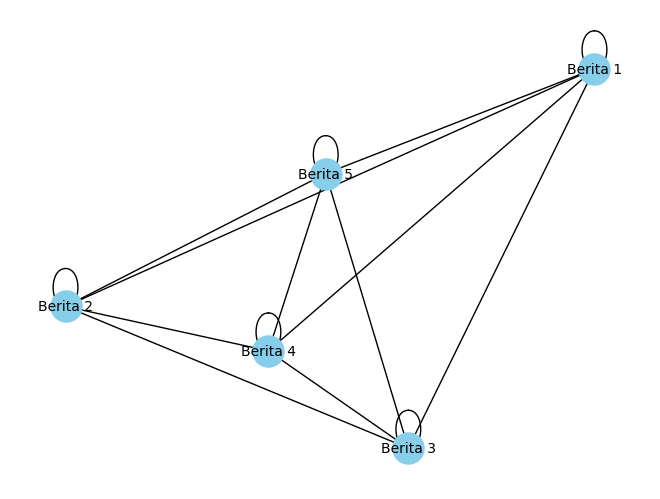

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Mengatur label pada node
labels = {i: f"Berita {i}" for i in G.nodes}

# Membuat posisi node (gunakan salah satu algoritma posisi, misalnya spring_layout)
pos = nx.spring_layout(G)

# Menggambar graf
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=10, font_color='black')

# Menampilkan graf
plt.show()


##Closeness Centrality

In [ ]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menampilkan closeness centrality dari setiap node
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node 5: Closeness Centrality = 1.0
Node 4: Closeness Centrality = 1.0
Node 3: Closeness Centrality = 1.0
Node 2: Closeness Centrality = 1.0
Node 1: Closeness Centrality = 1.0


In [ ]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menghitung PageRank
pagerank = nx.pagerank(G)

# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Menambahkan closeness centrality, pagerank, dan eigenvector centrality ke setiap node
for node, centrality in closeness_centrality.items():
    G.nodes[node]['Closeness Centrality'] = centrality
    G.nodes[node]['PageRank'] = pagerank[node]
    G.nodes[node]['Eigenvector Centrality'] = eigenvector_centrality[node]

# Menampilkan closeness centrality, pagerank, dan eigenvector centrality dari setiap node
for node, data in G.nodes(data=True):
    closeness = data['Closeness Centrality']
    pagerank = data['PageRank']
    eigenvector = data['Eigenvector Centrality']
    print(f"Node {node}: Closeness Centrality = {closeness}, PageRank = {pagerank}, Eigenvector Centrality = {eigenvector}")


Node 5: Closeness Centrality = 1.0, PageRank = 0.1905529773658591, Eigenvector Centrality = 0.4472135954999579
Node 4: Closeness Centrality = 1.0, PageRank = 0.1856486900773732, Eigenvector Centrality = 0.4472135954999579
Node 3: Closeness Centrality = 1.0, PageRank = 0.21203555716794228, Eigenvector Centrality = 0.4472135954999579
Node 2: Closeness Centrality = 1.0, PageRank = 0.2072083923853677, Eigenvector Centrality = 0.4472135954999579
Node 1: Closeness Centrality = 1.0, PageRank = 0.20455438300345777, Eigenvector Centrality = 0.4472135954999579
